#**Recommendation System on Delivery Food App Case using Content Based Filtering**

Pada latihan ini sistem rekomendasi menggunakan cara content-based filtering. Kita akan membangun sistem rekomendasi sederhana berdasarkan jenis masakan yang disediakan restoran. Data yang dibutuhkan adalah nama restoran dan cuisine. Kita akan menghitung kesamaan (similarity) cuisine dan nama restoran kemudian membuat rekomendasi berdasarkan kesamaan ini.

download dataset 

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2021-11-28 15:10:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39674 (39K) [application/x-httpd-php]
Saving to: ‘RCdata.zip’

RCdata.zip          100%[===================>]  38.74K  --.-KB/s    in 0.05s   

2021-11-28 15:10:08 (746 KB/s) - ‘RCdata.zip’ saved [39674/39674]



File RCdata.zip tersimpan di storage google colab. Lalu, unzip file tersebut.

In [2]:
!unzip /content/RCdata.zip

Archive:  /content/RCdata.zip
  inflating: chefmozaccepts.csv      
  inflating: chefmozcuisine.csv      
  inflating: chefmozhours4.csv       
  inflating: chefmozparking.csv      
  inflating: geoplaces2.csv          
  inflating: rating_final.csv        
  inflating: README                  
  inflating: usercuisine.csv         
  inflating: userpayment.csv         
  inflating: userprofile.csv         


9 berkas terdiri dari:

**Restaurants:**
- chefmozaccepts.csv
- chefmozcuisine.csv
- chefmozhours4.csv
- chefmozparking.csv
- geoplaces2.csv

**Consumers:**
- usercuisine.csv
- userpayment.csv
- userprofile.csv

**User-Item-Rating:**
- rating_final.csv

Baca masing-masing berkas

In [3]:
import pandas as pd
 
accepts = pd.read_csv('/content/chefmozaccepts.csv')
cuisine = pd.read_csv('/content/chefmozcuisine.csv')
hours = pd.read_csv('/content/chefmozhours4.csv')
parking = pd.read_csv('/content/chefmozparking.csv')
geo = pd.read_csv('/content/geoplaces2.csv', encoding = "ISO-8859-1")
usercuisine = pd.read_csv('/content/usercuisine.csv')
payment = pd.read_csv('/content/userpayment.csv')
profile = pd.read_csv('/content/userprofile.csv')
rating = pd.read_csv('/content/rating_final.csv')
 
print('Jumlah data pembayaran yang diterima restoran: ', len(accepts.placeID.unique()))
print('Jumlah data masakan pada restoran: ', len(cuisine.placeID.unique()))
print('Jumlah data waktu buka restoran: ', len(hours.placeID.unique()))
print('Jumlah data lokasi restoran: ', len(geo.placeID.unique()))
print('Jumlah data masakan pengguna: ', len(usercuisine.userID.unique()))
print('Jumlah data profil pengguna: ', len(profile.userID.unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(rating.userID.unique()))
print('Jumlah data penilaian restoran: ', len(rating.placeID.unique()))

Jumlah data pembayaran yang diterima restoran:  615
Jumlah data masakan pada restoran:  769
Jumlah data waktu buka restoran:  694
Jumlah data lokasi restoran:  130
Jumlah data masakan pengguna:  138
Jumlah data profil pengguna:  138
Jumlah data penilaian yang diberikan pengguna:  138
Jumlah data penilaian restoran:  130


#Univariate Exploratory Data Analysis

Variabel-variabel pada dataset:
- accepts : merupakan jenis pembayaran yang diterima pada restoran tertentu.
- cuisine : merupakan jenis masakan yang disajikan pada restoran.
- hours : merupakan jadwal buka dan tutupnya restoran.
- parking : merupakan ketersediaan tempat parkir pada restoran.
- geo : merupakan letak restoran.
- usercuisine : merupakan jenis masakan dari data pengguna.
- payment : merupakan jenis pembayaran yang dipakai pengguna.
- profile : merupakan data profil pengguna.

**Eksplorasi Data Accepts**

In [4]:
accepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB


melihat ada berapa banyak entri yang unik berdasarkan placeID dan jenis-jenis pembayaran unik yang diterima

In [5]:
print('Banyak data: ', len(accepts.placeID.unique()))
print('Jenis Pembayaran yang diterima: ', accepts.Rpayment.unique())

Banyak data:  615
Jenis Pembayaran yang diterima:  ['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


Data accept menunjukkan terdapat 1314 entri,namun hanya terdapat 615 data setelah disaring dengang fungsil unique()

**Eksplorasi Data Cuisine**

Variabel cuisine menunjukkan jenis masakan yang tersedia di restoran.

In [6]:
cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [7]:
print('Banyak tipe masakan: ', len(cuisine.Rcuisine.unique()))
print('Tipe masakan: ', cuisine.Rcuisine.unique())

Banyak tipe masakan:  59
Tipe masakan:  ['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


Data cuisine digunakan untuk memprediksi top-N rekomendasi bagi pengguna

**Eksplorasi Data Profile**

In [8]:
print(profile.shape)

(138, 19)


Terdapat 138 baris dan 19 kolom pada data profile.

In [9]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


**Eksplorasi Data Rating**

In [10]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


Data rating terdiri dari 5 kolom dengan tiga kategori rating.

Penjelasan masing-masing variabel:
- userID, merupakan identitas pengguna.
- placeID, merupakan identitas restoran.
- Rating, merupakan data rating untuk restoran.
- Food_rating, merupakan data rating untuk makanan atau masakan di restoran tersebut.
- Service_rating, merupakan data layanan restoran tersebut.

Melihat distribusi data pada data rating.

In [11]:
rating.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


Nilai maksimum rating adalah 2 dan nilai minimumnya adalah 0. 

Artinya, skala rating berkisar antara 0 hingga 2.

Melihat berapa pengguna yang memberikan rating, jumlah restoran, dan jumlah rating.

In [12]:
print('Jumlah userID: ', len(rating.userID.unique()))
print('Jumlah placeID: ', len(rating.placeID.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userID:  138
Jumlah placeID:  130
Jumlah data rating:  1161


#Data Preprocessing

**Menggabungkan 5 Data Restoran**

Identifikasi jumlah seluruh restoran pada dataset. Menggunakan placeID yang unik sebagai acuan dalam penggabungan.

In [56]:
import numpy as np
 
# Menggabungkan seluruh placeID pada kategori Restaurant
resto_all = np.concatenate((
    accepts.placeID.unique(),
    cuisine.placeID.unique(),
    hours.placeID.unique(),
    parking.placeID.unique(),
    geo.placeID.unique()
))
 
# Mengurutkan data dan menghapus data yang sama
resto_all = np.sort(np.unique(resto_all))
 
print('Jumlah seluruh data restoran berdasarkan placeID: ', len(resto_all))

Jumlah seluruh data restoran berdasarkan placeID:  938


**Menggabungkan 3 Data User**

In [57]:
# Menggabungkan seluruh userID
user_all = np.concatenate((
    usercuisine.userID.unique(),
    payment.userID.unique(),
    profile.userID.unique()
))
 
# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  138


**Mengetahui Jumlah Rating**

In [58]:
# Menggabungkan file accepts, geo, parking, hours ke dalam dataframe resto_info 
resto_info = pd.concat([accepts, geo, parking, hours])
 
# Menggabungkan dataframe rating dengan resto_info berdasarkan nilai placeID
resto = pd.merge(rating, resto_info , on='placeID', how='left')
resto

,userID,placeID,rating,food_rating,service_rating,user,resto,Rpayment,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services,parking_lot,hours,days
0,U1077,135085,2.0,2,2,0,0,cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U1077,135085,2.0,2,2,0,0,NaN,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,San Luis Potosi,SLP,Mexico,?,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none,NaN,NaN,NaN
2,U1077,135085,2.0,2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,NaN,NaN
3,U1077,135085,2.0,2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;
4,U1077,135085,2.0,2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Sat;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,U1068,132660,0.0,0,0,1,14,NaN,23.752943,-99.164679,0101000020957F00003D7905C9DC8157C13FCD1AB7334E...,carnitas mata calle Emilio Portes Gil,Emilio Portes Gil,victoria,tamaulipas,?,?,?,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none,NaN,NaN,NaN
8074,U1068,132660,0.0,0,0,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN
8075,U1068,132660,0.0,0,0,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
8076,U1068,132660,0.0,0,0,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Sat;


In [59]:
# Cek missing value dengan fungsi isnull()
resto.isnull().sum()

userID               0
placeID              0
rating               0
food_rating          0
service_rating       0
user                 0
resto                0
Rpayment          5781
latitude          6917
longitude         6917
the_geom_meter    6917
name              6917
address           6917
city              6917
state             6917
country           6917
fax               6917
zip               6917
alcohol           6917
smoking_area      6917
dress_code        6917
accessibility     6917
price             6917
url               6917
Rambience         6917
franchise         6917
area              6917
other_services    6917
parking_lot       6917
hours             4619
days              4619
dtype: int64

In [60]:
# Menghitung jumlah rating, food_rating, dan service kemudian menggabungkannya berdasarkan placeID
resto.groupby('placeID').sum()

,rating,food_rating,service_rating,user,resto,latitude,longitude
placeID,,,,,,,
132560,12.0,24,6,1632,264,95.009216,-396.667653
132561,15.0,20,20,2065,1160,94.907276,-396.506024
132564,25.0,25,30,1540,480,94.923698,-396.580739
132572,90.0,90,84,7494,2880,332.124707,-1514.890677
132583,24.0,24,30,678,384,75.689162,-396.937328
...,...,...,...,...,...,...,...
135088,36.0,42,36,858,540,113.256068,-595.319338
135104,48.0,80,48,2456,224,166.270875,-694.179039
135106,96.0,96,96,5664,5120,221.497088,-1009.760928


**Menggabungkan Data dengan Fitur Nama Resto**

In [61]:
# Definisikan dataframe rating ke dalam variabel all_resto_rate
all_resto_rate = rating
all_resto_rate

,userID,placeID,rating,food_rating,service_rating,user,resto
0,U1077,135085,2.0,2,2,0,0
1,U1077,135038,2.0,2,1,0,1
2,U1077,132825,2.0,2,2,0,2
3,U1077,135060,1.0,2,2,0,3
4,U1068,135104,1.0,1,2,1,4
...,...,...,...,...,...,...,...
1156,U1043,132630,1.0,1,1,136,8
1157,U1011,132715,1.0,1,0,137,21
1158,U1068,132733,1.0,1,0,1,10
1159,U1068,132594,1.0,1,1,1,23


In [62]:
# Menggabungkan all resto_rate dengan dataframe geo berdasarkan placeID
all_resto_name = pd.merge(all_resto_rate, geo[['placeID','name']], on='placeID', how='left')
 
# Print dataframe all_resto_name
all_resto_name

,userID,placeID,rating,food_rating,service_rating,user,resto,name
0,U1077,135085,2.0,2,2,0,0,Tortas Locas Hipocampo
1,U1077,135038,2.0,2,1,0,1,Restaurant la Chalita
2,U1077,132825,2.0,2,2,0,2,puesto de tacos
3,U1077,135060,1.0,2,2,0,3,Restaurante Marisco Sam
4,U1068,135104,1.0,1,2,1,4,vips
...,...,...,...,...,...,...,...,...
1156,U1043,132630,1.0,1,1,136,8,palomo tec
1157,U1011,132715,1.0,1,0,137,21,tacos de la estacion
1158,U1068,132733,1.0,1,0,1,10,Little Cesarz
1159,U1068,132594,1.0,1,1,1,23,tacos de barbacoa enfrente del Tec


**Menggabungkan Data dengan Fitur masakan Resto**

Menggabungkan variabel all_resto_name yang kita peroleh dari tahapan sebelumnya dengan fitur masakan resto (cuisine). Tujuannya, agar kita mengetahui masakan yang disediakan oleh restoran.

In [63]:
# Menggabungkan dataframe cuisine dengan all_resto_name dan memasukkannya ke dalam variabel all_resto 
all_resto = pd.merge(all_resto_name, cuisine, on='placeID', how='left')
all_resto

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
0,U1077,135085,2.0,2,2,0,0,Tortas Locas Hipocampo,Fast_Food
1,U1077,135038,2.0,2,1,0,1,Restaurant la Chalita,NaN
2,U1077,132825,2.0,2,2,0,2,puesto de tacos,Mexican
3,U1077,135060,1.0,2,2,0,3,Restaurante Marisco Sam,Seafood
4,U1068,135104,1.0,1,2,1,4,vips,Mexican
...,...,...,...,...,...,...,...,...,...
1326,U1043,132630,1.0,1,1,136,8,palomo tec,Mexican
1327,U1011,132715,1.0,1,0,137,21,tacos de la estacion,Mexican
1328,U1068,132733,1.0,1,0,1,10,Little Cesarz,Pizzeria
1329,U1068,132594,1.0,1,1,1,23,tacos de barbacoa enfrente del Tec,Mexican


#Data Preparation

**Mengatasi Missing Value**

In [64]:
# Mengecek missing value pada dataframe all_resto
all_resto.isnull().sum()

userID              0
placeID             0
rating              0
food_rating         0
service_rating      0
user                0
resto               0
name                0
Rcuisine          288
dtype: int64

In [65]:
# Membersihkan missing value dengan fungsi dropna()
all_resto_clean = all_resto.dropna()
all_resto_clean

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
0,U1077,135085,2.0,2,2,0,0,Tortas Locas Hipocampo,Fast_Food
2,U1077,132825,2.0,2,2,0,2,puesto de tacos,Mexican
3,U1077,135060,1.0,2,2,0,3,Restaurante Marisco Sam,Seafood
4,U1068,135104,1.0,1,2,1,4,vips,Mexican
5,U1068,132740,0.0,0,0,1,5,Carreton de Flautas y Migadas,Mexican
...,...,...,...,...,...,...,...,...,...
1325,U1043,132732,1.0,1,1,136,7,Taqueria EL amigo,Mexican
1326,U1043,132630,1.0,1,1,136,8,palomo tec,Mexican
1327,U1011,132715,1.0,1,0,137,21,tacos de la estacion,Mexican
1328,U1068,132733,1.0,1,0,1,10,Little Cesarz,Pizzeria


In [66]:
# Mengecek kembali missing value pada variabel all_resto_clean
all_resto_clean.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
user              0
resto             0
name              0
Rcuisine          0
dtype: int64

**Menyamakan Jenis masakan**

Cek ulang data setelah proses cleaning pada tahap sebelumnya

In [67]:
# Mengurutkan resto berdasarkan PlaceID kemudian memasukkannya ke dalam variabel fix_resto
fix_resto = all_resto_clean.sort_values('placeID', ascending=True)
fix_resto

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
1303,U1087,132560,1.0,2,1,132,11,puesto de gorditas,Regional
1288,U1050,132560,0.0,2,0,130,11,puesto de gorditas,Regional
14,U1067,132560,1.0,0,0,2,11,puesto de gorditas,Regional
42,U1082,132560,0.0,0,0,8,11,puesto de gorditas,Regional
1052,U1013,132572,1.0,1,0,88,32,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...,...,...
438,U1024,135106,1.0,1,1,57,64,El Rincón de San Francisco,Mexican
178,U1020,135109,2.0,2,1,31,50,Paniroles,Italian
1071,U1041,135109,1.0,2,1,115,50,Paniroles,Italian
99,U1030,135109,0.0,0,0,19,50,Paniroles,Italian


In [68]:
# Mengecek berapa jumlah fix_resto
len(fix_resto.placeID.unique())

95

In [69]:
# Mengecek kategori masakan yang unik
fix_resto.Rcuisine.unique()

array(['Regional', 'Cafeteria', 'American', 'Mexican', 'Fast_Food',
       'Italian', 'Armenian', 'Pizzeria', 'Japanese', 'Vietnamese',
       'Family', 'International', 'Game', 'Burgers', 'Bakery', 'Bar',
       'Breakfast-Brunch', 'Bar_Pub_Brewery', 'Mediterranean',
       'Cafe-Coffee_Shop', 'Contemporary', 'Seafood', 'Chinese'],
      dtype=object)

In [70]:
# Mengecek kategori masakan Game 
fix_resto[fix_resto['Rcuisine'] == 'Game']

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
781,U1015,132851,1.0,1,1,11,107,KFC,Game
509,U1052,132851,1.0,0,2,63,107,KFC,Game
708,U1008,132851,1.0,1,1,83,107,KFC,Game
770,U1037,132851,2.0,2,1,62,107,KFC,Game
574,U1069,132851,1.0,0,0,71,107,KFC,Game
1188,U1131,132851,2.0,2,2,122,107,KFC,Game
764,U1111,132851,2.0,1,0,90,107,KFC,Game


In [71]:
# Mengecek kategori masakan pada nama restoran KFC
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
781,U1015,132851,1.0,1,1,11,107,KFC,Game
508,U1052,132851,1.0,0,2,63,107,KFC,American
780,U1015,132851,1.0,1,1,11,107,KFC,American
509,U1052,132851,1.0,0,2,63,107,KFC,Game
708,U1008,132851,1.0,1,1,83,107,KFC,Game
707,U1008,132851,1.0,1,1,83,107,KFC,American
770,U1037,132851,2.0,2,1,62,107,KFC,Game
769,U1037,132851,2.0,2,1,62,107,KFC,American
1187,U1131,132851,2.0,2,2,122,107,KFC,American
574,U1069,132851,1.0,0,0,71,107,KFC,Game


KFC lebih cocok disebut sebagai restoran dengan kategori masakan American. Jadi, kita perlu mengganti kategori ‘Game’ dengan ‘American’. 

In [72]:
# Mengubah nama kategori masakan ‘Game’ menjadi ‘American’
fix_resto = fix_resto.replace('Game', 'American')
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
781,U1015,132851,1.0,1,1,11,107,KFC,American
508,U1052,132851,1.0,0,2,63,107,KFC,American
780,U1015,132851,1.0,1,1,11,107,KFC,American
509,U1052,132851,1.0,0,2,63,107,KFC,American
708,U1008,132851,1.0,1,1,83,107,KFC,American
707,U1008,132851,1.0,1,1,83,107,KFC,American
770,U1037,132851,2.0,2,1,62,107,KFC,American
769,U1037,132851,2.0,2,1,62,107,KFC,American
1187,U1131,132851,2.0,2,2,122,107,KFC,American
574,U1069,132851,1.0,0,0,71,107,KFC,American


Dalam sistem rekomendasi yang kita kembangkan, penting untuk memastikan satu restoran mewakili satu kategori masakan.

In [73]:
# Membuat variabel preparation yang berisi dataframe fix_resto kemudian mengurutkan berdasarkan placeID
preparation = fix_resto
preparation.sort_values('placeID')

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
1303,U1087,132560,1.0,2,1,132,11,puesto de gorditas,Regional
1288,U1050,132560,0.0,2,0,130,11,puesto de gorditas,Regional
14,U1067,132560,1.0,0,0,2,11,puesto de gorditas,Regional
42,U1082,132560,0.0,0,0,8,11,puesto de gorditas,Regional
184,U1055,132572,2.0,2,2,33,32,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...,...,...
1224,U1002,135106,1.0,1,1,125,64,El Rincón de San Francisco,Mexican
99,U1030,135109,0.0,0,0,19,50,Paniroles,Italian
178,U1020,135109,2.0,2,1,31,50,Paniroles,Italian
1071,U1041,135109,1.0,2,1,115,50,Paniroles,Italian


Hanya perlu menggunakan data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, kita harus menghapus data yang duplikat dengan fungsi drop_duplicates().

In [74]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('placeID')
preparation

,userID,placeID,rating,food_rating,service_rating,user,resto,name,Rcuisine
1303,U1087,132560,1.0,2,1,132,11,puesto de gorditas,Regional
1052,U1013,132572,1.0,1,0,88,32,Cafe Chaires,Cafeteria
168,U1118,132583,0.0,0,0,25,16,McDonalds Centro,American
24,U1107,132584,2.0,2,2,4,9,Gorditas Dona Tota,Mexican
1329,U1068,132594,1.0,1,1,1,23,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...,...,...,...,...,...,...
681,U1095,135086,1.0,2,1,79,36,Mcdonalds Parque Tangamanga,Fast_Food
175,U1020,135088,1.0,2,0,31,15,Cafeteria cenidet,Cafeteria
4,U1068,135104,1.0,1,2,1,4,vips,Mexican
488,U1004,135106,2.0,2,2,61,64,El Rincón de San Francisco,Mexican


In [75]:
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
resto_id = preparation['placeID'].tolist()
 
# Mengonversi data series ‘Name’ menjadi dalam bentuk list
resto_name = preparation['name'].tolist()
 
# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
resto_cuisine = preparation['Rcuisine'].tolist()
 
print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


In [76]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
resto_new = pd.DataFrame({
    'id': resto_id,
    'resto_name': resto_name,
    'cuisine': resto_cuisine
})
resto_new

,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Fast_Food
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


#Model Development dengan Content Based Filtering

Cek kembali data yang kita miliki dan assign dataframe dari tahap sebelumnya ke dalam variabel data

In [34]:
data = resto_new
data.sample(5)

,id,resto_name,cuisine
29,132845,Cenaduria El RincÃ³n de Tlaquepaque,Mexican
74,135052,La Cantina Restaurante,Bar_Pub_Brewery
77,135055,la Cochinita Pibil Restaurante Yucateco,Mexican
60,135027,Restaurant Orizatlan,Mexican
42,132885,Hamburguesas saul,Cafeteria


TF-IDF Vectorizer digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori masakan

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(data['cuisine']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['american',
 'armenian',
 'bar',
 'bar_pub_brewery',
 'breakfast',
 'brunch',
 'burgers',
 'cafe',
 'cafeteria',
 'chinese',
 'coffee_shop',
 'contemporary',
 'family',
 'fast_food',
 'international',
 'italian',
 'japanese',
 'mexican',
 'pizzeria',
 'regional',
 'seafood',
 'vietnamese']

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['cuisine']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(95, 22)

Nilai 95 merupakan ukuran data dan 22 merupakan matrik kategori masakan.

In [37]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Mengidentifikasi Korelasi antara Restoran dengan Kategori Masakannya

In [38]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.resto_name
).sample(22, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,italian,coffee_shop,american,pizzeria,mexican,fast_food,seafood,brunch,breakfast,cafeteria,regional,cafe,japanese,vietnamese,bar,international,chinese,bar_pub_brewery,contemporary,family,burgers,armenian
resto_name,,,,,,,,,,,,,,,,,,,,,,
Kiku Cuernavaca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carnitas_mata,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cenaduria El RincÃ³n de Tlaquepaque,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tacos los volcanes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Restaurant Wu Zhuo Yi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
palomo tec,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Little Cesarz,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
crudalia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
la perica hamburguesa,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menghitung Derajat Kesamaan (similarity degree) antar Restoran dengan Teknik Cosine Similarity

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Lihat matriks kesamaan setiap resto dengan menampilkan nama restoran dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [40]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['resto_name'], columns=data['resto_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (95, 95)


resto_name,El Oceano Dorado,rockabilly,la Cantina,TACOS CORRECAMINOS,Gorditas Dona Tota
resto_name,,,,,
Pollo_Frito_Buenos_Aires,0.0,0.0,0.0,0.0,0.0
Tortas Locas Hipocampo,0.0,0.0,0.0,0.0,0.0
Gorditas Dona Tota,1.0,0.0,0.0,1.0,1.0
vips,1.0,0.0,0.0,1.0,1.0
Luna Cafe,0.0,1.0,0.0,0.0,0.0
Cafeteria cenidet,0.0,0.0,0.0,0.0,0.0
La Virreina,1.0,0.0,0.0,1.0,1.0
Little Cesarz,0.0,0.0,0.0,0.0,0.0
puesto de tacos,1.0,0.0,0.0,1.0,1.0


matriks di atas berukuran 95 restoran x 95 restoran. Tapi kita tidak bisa menampilkan semuanya. Oleh karena itu, kita hanya memilih 10 restoran pada baris vertikal dan 5 restoran pada sumbu horizontal.

Dari matriks di atas dapat kita pahami sebagai: Luna Cafe teridentifikasi sama (similar) dengan Abondance Restaurant Bar.

#Mendapatkan Rekomendasi

Membuat fungsi resto_recommendations dengan beberapa parameter sebagai berikut:

- Nama_resto : Nama restoran (index kemiripan dataframe).
- Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘resto_name’ dan ‘cuisine’.
- k : Banyak rekomendasi yang ingin diberikan.

Memberikan sejumlah rekomendasi restoran pada pengguna yang diatur dalam parameter k

In [41]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim_df, items=data[['resto_name', 'cuisine']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_resto, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Dengan menggunakan argpartition, kita mengambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, kita mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, kita perlu menghapus nama_resto yang yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, nanti kita akan mencari resto yang mirip dengan KFC, sehingga kita perlu drop nama_resto KFC agar tidak muncul dalam daftar rekomendais yang diberikan nanti.  

#Cari resto yang mirip dengan KFC

In [42]:
data[data.resto_name.eq('KFC')]

,id,resto_name,cuisine
31,132851,KFC,American


In [43]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
resto_recommendations('KFC')

,resto_name,cuisine
0,VIPS,American
1,tacos los volcanes,American
2,Pizzeria Julios,American
3,Sirlone,International
4,McDonalds Centro,American


#**Recommendation System on Delivery Food App Case using Collaborative Based Filtering**

Ingatlah saat Anda melakukan load data di awal dan membaca file rating_final.csv. Saat itu, Anda membuat variabel rating dan menetapkan data pada variabel tersebut. Untuk memudahkan supaya tidak tertukar dengan fitur ‘rating’ pada data, kita ubah nama variabel rating menjadi df.

In [44]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [45]:
# Membaca dataset
 
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


#Data Preparation

Menyandikan (encode) fitur ‘user’ dan ‘placeID’ ke dalam indeks integer

In [46]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userID'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U10

In [47]:
# Mengubah placeID menjadi list tanpa nilai yang sama
resto_ids = df['placeID'].unique().tolist()
 
# Melakukan proses encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}
 
# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

Petakan userID dan placeID ke dataframe yang berkaitan

In [48]:
# Mapping userID ke dataframe user
df['user'] = df['userID'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['resto'] = df['placeID'].map(resto_to_resto_encoded)

Cek beberapa hal dalam data seperti jumlah user, jumlah resto, dan mengubah nilai rating menjadi float.

In [49]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_resto = len(resto_encoded_to_resto)
print(num_resto)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


#Membagi Data untuk Training dan Validasi

In [50]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
538,U1052,132870,1.0,1,1,63,116
673,U1015,132869,2.0,2,2,11,115
578,U1047,132875,0.0,0,0,78,117
242,U1056,135076,2.0,2,2,41,71
1063,U1002,135106,1.0,1,1,125,64
...,...,...,...,...,...,...,...
1044,U1073,135065,0.0,0,0,123,94
1095,U1058,135062,2.0,2,2,124,76
1130,U1087,132660,1.0,1,0,132,14
860,U1029,132937,1.0,1,1,110,126


Memetakan (mapping) data user dan resto menjadi satu value. Lalu, split data train dan data validasi dengan komposisi 80:20.

In [51]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'resto']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


#Proses Training

In [52]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

proses compile terhadap model

In [53]:
model = RecommenderNet(num_users, num_resto, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

In [54]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
116/116 [==============================] - 2s 5ms/step - loss: 0.7039 - root_mean_squared_error: 0.4050 - val_loss: 0.6869 - val_root_mean_squared_error: 0.3972
Epoch 2/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6778 - root_mean_squared_error: 0.3890 - val_loss: 0.6805 - val_root_mean_squared_error: 0.3933
Epoch 3/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6657 - root_mean_squared_error: 0.3813 - val_loss: 0.6761 - val_root_mean_squared_error: 0.3905
Epoch 4/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6479 - root_mean_squared_error: 0.3700 - val_loss: 0.6726 - val_root_mean_squared_error: 0.3883
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6353 - root_mean_squared_error: 0.3619 - val_loss: 0.6688 - val_root_mean_squared_error: 0.3859
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6308 - root_mean_squared_error: 0.3590 - val_loss: 0.6653 

# Visualisasi Metrik

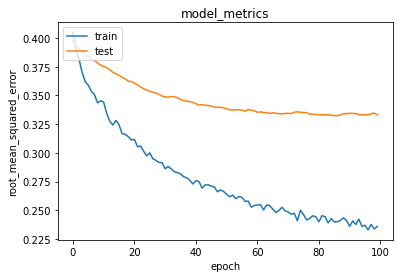

In [77]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model konvergen pada epochs sekitar 100. error akhir sebesar sekitar 0.23 dan error pada data validasi sebesar 0.34. Nilai tersebut cukup bagus untuk sistem rekomendasi. 

#Mendapatkan Rekomendasi Resto

pertama kita ambil sampel user secara acak dan definisikan variabel resto_not_visited yang merupakan daftar resto yang belum pernah dikunjungi oleh pengguna

In [82]:
resto_df = resto_new
df = pd.read_csv('rating_final.csv')
 
# Mengambil sample user
user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
resto_not_visited = resto_df[~resto_df['id'].isin(resto_visited_by_user.placeID.values)]['id'] 
resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_to_resto_encoded.keys()))
)
 
resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

untuk memperoleh rekomendasi restoran, gunakan fungsi model.predict() dari library Keras

In [83]:
ratings = model.predict(user_resto_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)
 
top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .placeID.values
)
 
resto_df_rows = resto_df[resto_df['id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(row.resto_name, ':', row.cuisine)
 
print('----' * 8)
print('Top 10 resto recommendation')
print('----' * 8)
 
recommended_resto = resto_df[resto_df['id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(row.resto_name, ':', row.cuisine)

Showing recommendations for users: U1104
Resto with high ratings from user
--------------------------------
puesto de tacos : Mexican
El Rincon de San Francisco : Mexican
Preambulo Wifi Zone Cafe : Cafe-Coffee_Shop
Cafeteria y Restaurant El Pacifico : Cafeteria
Tortas Locas Hipocampo : Fast_Food
--------------------------------
Top 10 resto recommendation
--------------------------------
La Estrella de Dimas : Mexican
cafe punta del cielo : Cafeteria
rockabilly  : Bar
emilianos : Bar_Pub_Brewery
Restaurant Las Mananitas : International
Kiku Cuernavaca : Japanese
El Oceano Dorado : Mexican
La Virreina : Mexican
Michiko Restaurant Japones : Japanese
El Mundo de la Pasta : Italian


Dari output tersebut, kita dapat membandingkan antara Resto with high ratings from user dan Top 10 resto recommendation untuk user. 